In [37]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.2.2'

In [38]:
from pandas import read_csv

# Carregando os dados
arquivo = 'dados/pima-data-banceled.csv'
dados = read_csv(arquivo)

In [39]:
# Distribuição das classes
dados.groupby('class').size()

class
0    268
1    268
dtype: int64

In [40]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv

In [41]:
# Separando o array em componentes de input e output
array = dados.values
X = array[:,0:8]
Y = array[:,9]

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[5.71e+02 2.00e+00 1.30e+02 ... 2.68e-01 2.10e+01 0.00e+00]
 [3.58e+02 1.20e+01 8.80e+01 ... 3.78e-01 4.80e+01 0.00e+00]
 [3.74e+02 2.00e+00 1.22e+02 ... 8.16e-01 2.80e+01 0.00e+00]
 ...
 [7.59e+02 6.00e+00 1.90e+02 ... 2.78e-01 6.60e+01 1.00e+00]
 [7.61e+02 9.00e+00 1.70e+02 ... 4.03e-01 4.30e+01 1.00e+00]
 [7.66e+02 1.00e+00 1.26e+02 ... 3.49e-01 4.70e+01 1.00e+00]]

Dados Normalizados: 

 [[0.74543081 0.11764706 0.65326633 0.78688525 0.         0.
  0.33681073 0.07876712]
 [0.46736292 0.70588235 0.44221106 0.60655738 0.4040404  0.06382979
  0.52608048 0.12585616]
 [0.48825065 0.11764706 0.61306533 0.42622951 0.43434343 0.18676123
  0.53949329 0.31335616]
 [0.33420366 0.17647059 0.55778894 0.45901639 0.39393939 0.
  0.4485842  0.20248288]
 [0.32506527 0.05882353 0.55778894 0.70491803 0.19191919 0.
  0.4485842  0.02525685]]


In [43]:
X = rescaledX

In [44]:
# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# field names 
fields = ['Tipo','Modelo', 'Descrição Modelo', 'Acurária', 'Desvio'] 
    
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))
modelos.append(('RF', RandomForestClassifier(n_estimators=100)))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

with open('resultados/resultados.csv', 'a') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    #write.writerow(fields)

    # Construção dos Modelos
    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
        cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
        resultados.append(cv_results)
        nomes.append(nome)
        msg = "%s - %s: %f (%f)" % (nome, modelo, cv_results.mean(), cv_results.std())
        print(msg)

        # data rows of csv file 
        rows = [['MinMaxScaler', nome, modelo, cv_results.mean(), cv_results.std() ] ]
        write.writerows(rows)
    
    # Close the file object
    f.close()


LR - LogisticRegression(): 0.757566 (0.085721)
LDA - LinearDiscriminantAnalysis(): 0.761323 (0.088714)
KNN - KNeighborsClassifier(): 0.677302 (0.096245)
CART - DecisionTreeClassifier(): 0.703598 (0.054530)
SVM - SVC(): 0.750317 (0.089870)
GNB - GaussianNB(): 0.740794 (0.075950)
RF - RandomForestClassifier(): 0.755926 (0.074461)


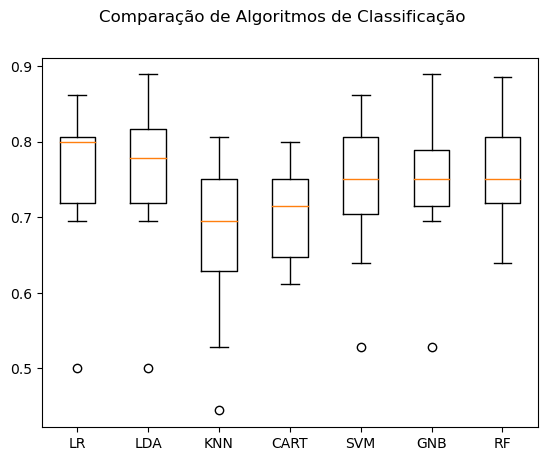

In [45]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)

plt.savefig("graficos/Normalizacao_MinMaxScaler.png")

plt.show()